In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Models
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm as SVM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Metrics
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve


# math
from math import sqrt

In [3]:
DF = pd.read_csv("covid19_cleaned_8_10.zip",low_memory = False)

In [4]:
DF.columns

Index(['Unnamed: 0', 'ID', 'age', 'sex', 'city', 'province', 'country',
       'latitude', 'longitude', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'chronic_disease_binary', 'chronic_disease',
       'outcome', 'date_death_or_discharge', 'admin3', 'admin2', 'admin1',
       'travel_history_binary', 'hospitalized', 'deceased', 'fever', 'cough',
       'fatigue', 'headache', 'dizziness', 'sore throat', 'pneumonia',
       'respiratory', 'nausea', 'diarrhea', 'severe_r'],
      dtype='object')

In [5]:
# Get the data training ready in this cell.

# Our working dataframe:
df_trimmed = DF

# Select just the columns we will train and test on
df_trimmed = DF.loc[:, [
        "sex",
        "deceased",
        "hospitalized",
        "fever",
        "cough",
        "fatigue",
        "respiratory",
        "headache",
        "dizziness",
        "pneumonia",
        "nausea",
        "diarrhea",
        "severe_r" 
        ]
]

#boolify "sex"
df_trimmed.loc[:,"sex"] = [0 if s == "male" else 1 for s in df_trimmed["sex"]]


df_trimmed = df_trimmed.dropna()


In [20]:
len(df_trimmed)

2023

In [87]:
# We will train, test, and evaluate many different models
# Define a function that performs a single train test split on a model
# to avoid repeated code.
def tts(model, x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)
    model.fit(xtrain, ytrain)
    yp = model.predict(xtest)
    probs = model.predict_proba(xtest)
    acc = accuracy_score(ytest,yp)
    return ytest, probs, acc, yp

In [88]:
# Simple ROC curve on two features.
# predict y from x.
def rocFromCol(model, x, y, label):
    ytest, prob, acc = tts(model, x, y)
    fpr, tpr, thresh = roc_curve(ytest, prob[:,1])
    plt.plot(fpr, tpr, c=np.random.rand(3,), label=label)
    plt.plot([0,1],[0,1],c="k",ls="--")
    plt.gcf().set_size_inches(6,6) 
    plt.xlabel("False Positive Rate",fontsize=14)
    plt.ylabel("True Positive Rate",fontsize=14)
    plt.grid()
    plt.legend()
    return plt.gcf()

# Evaluating Various Models With Cross Validation Scores

In [11]:
# Instantiate our models

# Artificial Neural Network
ann = ANN(hidden_layer_sizes=(16,8,4), max_iter=1000)

# Support Vector Classifier
svm = SVM.SVC()

# Logistic Regression
lr = LR(max_iter=1000)

# Naive bayes
nb = NB()

# K nearest neighbors
kn = KNeighborsClassifier(n_neighbors=45)  

In [13]:
x_deceased_model = df_trimmed.drop("deceased", axis=1)
y_deceased_truevals = df_trimmed["deceased"]

In [31]:
cv_deceased_scores_ann = cross_validate(
    ann, 
    x_deceased_model, 
    y_deceased_truevals,
    cv=5, 
    scoring="accuracy"
)

In [32]:
cv_deceased_scores_kn = cv_deceased_scores_ann = cross_validate(
    kn, 
    x_deceased_model, 
    y_deceased_truevals,
    cv=5, 
    scoring="accuracy"
)

In [33]:
cv_deceased_scores_svm = cv_deceased_scores_ann = cross_validate(
    svm, 
    x_deceased_model, 
    y_deceased_truevals,
    cv=5, 
    scoring="accuracy"
)

In [91]:
cv_deceased_scores_lr = cv_deceased_scores_ann = cross_validate(
    lr, 
    x_deceased_model, 
    y_deceased_truevals,
    cv=5, 
    scoring="accuracy"
)

In [35]:
cv_deceased_scores_nb = cv_deceased_scores_ann = cross_validate(
    nb, 
    x_deceased_model, 
    y_deceased_truevals,
    cv=5, 
    scoring="accuracy"
)

In [77]:
cv_test_scores = [
    cv_deceased_scores_ann["test_score"],
    cv_deceased_scores_kn["test_score"],
    cv_deceased_scores_svm["test_score"],
    cv_deceased_scores_lr["test_score"],
    cv_deceased_scores_nb["test_score"]
]

model_labels = ["ANN", "KNN", "SVM", "LR", "NB"]

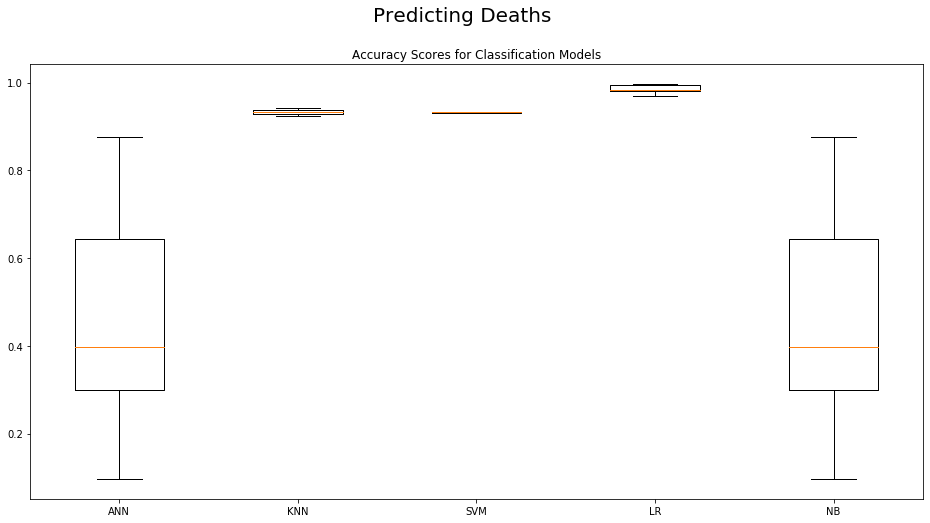

In [134]:
cv_test_scores = [
    cv_deceased_scores_ann["test_score"],
    cv_deceased_scores_kn["test_score"],
    cv_deceased_scores_svm["test_score"],
    cv_deceased_scores_lr["test_score"],
    cv_deceased_scores_nb["test_score"]
]

_ = plt.boxplot(cv_test_scores, labels=["ANN", "KNN", "SVM", "LR", "NB"])
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.suptitle("Predicting Deaths", fontsize=20)
_ = plt.title("Accuracy Scores for Classification Models")

In [93]:
np.mean(cv_deceased_scores_lr["test_score"])

0.9851729617406185

In [93]:
cv_deceased_scores_nb

{'fit_time': array([0.00299954, 0.0030005 , 0.0030005 , 0.00199866, 0.00200033]),
 'score_time': array([0.00099993, 0.00099969, 0.00100064, 0.00099945, 0.00099969]),
 'test_score': array([0.29876543, 0.39753086, 0.0962963 , 0.64356436, 0.87623762])}

In [103]:
cv_accuracy_means = [np.mean(l) for l in cv_test_scores]

In [144]:
cv_accuracy_means

[0.4624789145581225,
 0.9332697714215866,
 0.9322796724116857,
 0.9851729617406185,
 0.4624789145581225]

In [119]:
cv_accuracy_stds = [np.std(l) for l in cv_test_scores]

In [145]:
cv_accuracy_stds

[0.27169772549804155,
 0.006969506036385336,
 0.001157300084218942,
 0.0100016702186475,
 0.27169772549804155]

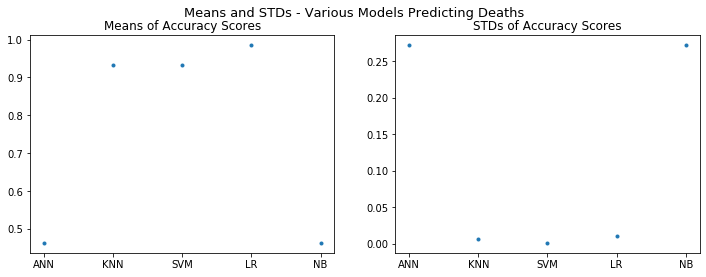

In [302]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(
    np.arange(5), 
    cv_accuracy_means, 
    linestyle="none",
    marker="."
)
ax[0].set_title("Means of Accuracy Scores")
ax[0].set_xticks(np.arange(5))
ax[0].set_xticklabels(model_labels)

ax[1].plot(
    np.arange(5), 
    cv_accuracy_stds, 
    linestyle="none",
    marker="."
)
ax[1].set_title("STDs of Accuracy Scores")
ax[1].set_xticks(np.arange(5))
ax[1].set_xticklabels(model_labels)

plt.suptitle("Means and STDs - Various Models Predicting Deaths", fontsize=13)


fig = plt.gcf()
fig.set_size_inches(12,4)

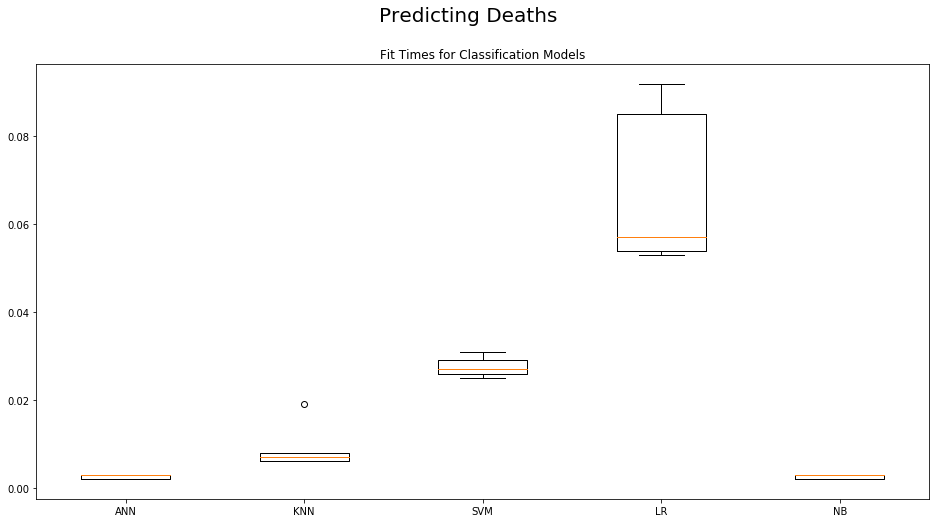

In [136]:
cv_test_scores = [
    cv_deceased_scores_ann["fit_time"],
    cv_deceased_scores_kn["fit_time"],
    cv_deceased_scores_svm["fit_time"],
    cv_deceased_scores_lr["fit_time"],
    cv_deceased_scores_nb["fit_time"]
]

_ = plt.boxplot(cv_test_scores, labels=["ANN", "KNN", "SVM", "LR", "NB"])
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.suptitle("Predicting Deaths", fontsize=20)
_ = plt.title("Fit Times for Classification Models")


# Cross Validation Results - Deaths

Naive Bayes and Artificial Neural Network were not good predictors of deaths on symptoms.

Logistic Regression gives us the highest accuracy compared with other models.

Its standard deviation is nearly the same as KNN and SVM, which also gave us high accuracies.

The fit time for Logistic Regression is higher than our other models, but our primary concerns in predicting COVID deaths is accuracy.



## Predicting Deaths from Symptoms Using Logistic Regression

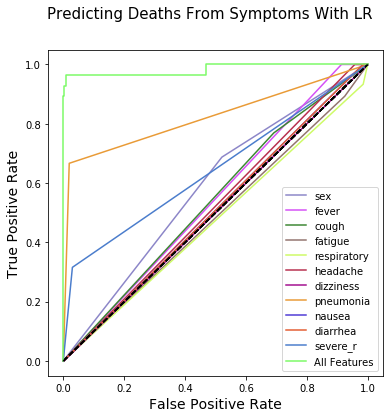

In [146]:
predictorLabels = [
    "sex",
    "fever",
    "cough",
    "fatigue",
    "respiratory",
    "headache",
    "dizziness",
    "pneumonia",
    "nausea",
    "diarrhea",
    "severe_r" 
]

figs = []
for label in predictorLabels:
    if label != "deceased":
        x = df_trimmed[label].values.reshape(-1,1)
        y = df_trimmed["deceased"].values
        figs.append(rocFromCol(lr, x, y, label))
        
figs.append(rocFromCol(lr, x_deceased_model, y_deceased_truevals, "All Features"))
plt.suptitle("Predicting Deaths From Symptoms With LR", fontsize=15)
plt.show()

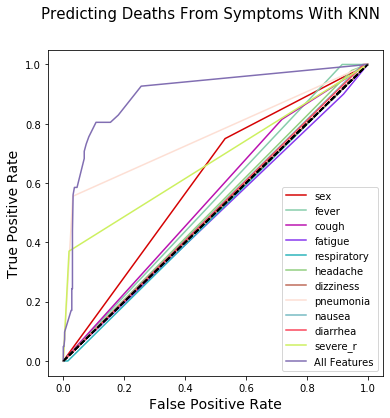

In [299]:
figs = []
predictorLabels = [
    "sex",
    "fever",
    "cough",
    "fatigue",
    "respiratory",
    "headache",
    "dizziness",
    "pneumonia",
    "nausea",
    "diarrhea",
    "severe_r" 
]

for label in predictorLabels:
    if label != "deceased":
        x = df_trimmed[label].values.reshape(-1,1)
        y = df_trimmed["deceased"].values
        figs.append(rocFromCol(kn, x, y, label))
        
figs.append(rocFromCol(kn, x_deceased_model, y_deceased_truevals, "All Features"))
plt.suptitle("Predicting Deaths From Symptoms With KNN", fontsize=15)
plt.show()

In [83]:
def plotROCFromModel(model, x, y, title, predictee):
    figs = []
    predictorLabels = [
        "sex",
        "fever",
        "cough",
        "fatigue",
        "respiratory",
        "headache",
        "dizziness",
        "pneumonia",
        "nausea",
        "diarrhea",
        "severe_r" 
    ]

    for label in predictorLabels:
        if label != predictee:
            X = df_trimmed[label].values.reshape(-1,1)
            Y = df_trimmed[predictee].values
            figs.append(rocFromCol(model, X, Y, label))

    figs.append(rocFromCol(model, x, y, "All Features"))
    plt.suptitle(title, fontsize=15)
    
    return figs

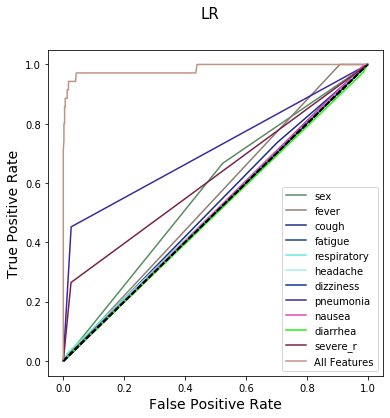

In [212]:
fig = plotROCFromModelDeceased(lr, x_deceased_model, y_deceased_truevals, "LR")

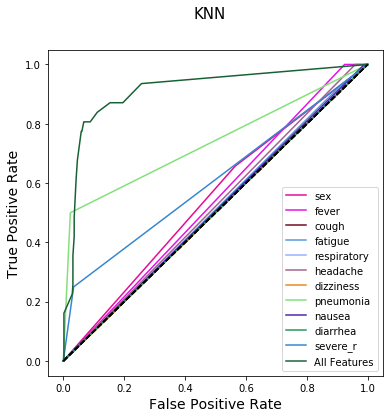

In [213]:
fig = plotROCFromModelDeceased(kn, x_deceased_model, y_deceased_truevals, "KNN")

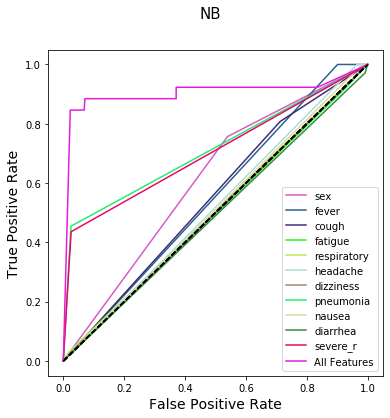

In [214]:
fig = plotROCFromModelDeceased(nb, x_deceased_model, y_deceased_truevals, "NB")

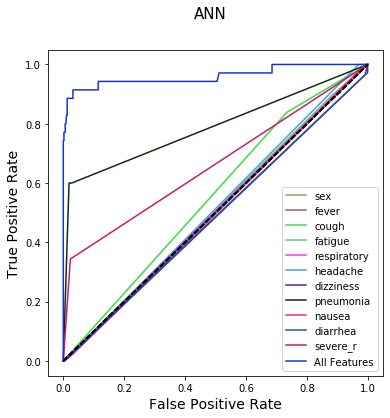

In [215]:
fig = plotROCFromModelDeceased(ann, x_deceased_model, y_deceased_truevals, "ANN")

In [ ]:
print(lr, )

x_deceased_model = df_trimmed.drop("deceased", axis=1)
y_deceased_truevals

# Evaluating Cross Validation Scores - Hospitalizations

In [245]:
# Use symptoms & sex to predict hospitalizations
x_hospitalization_model = df_trimmed.drop("hospitalized", axis=1)
y_hospitalization_truevals = df_trimmed["hospitalized"]

In [246]:
cv_hosp_scores_ann = cross_validate(
    ann, 
    x_hospitalization_model, 
    y_hospitalization_truevals,
    cv=5, 
    scoring="accuracy"
)

In [247]:
cv_hosp_scores_kn = cross_validate(
    kn, 
    x_hospitalization_model, 
    y_hospitalization_truevals,
    cv=5, 
    scoring="accuracy"
)

In [248]:
cv_hosp_scores_svm = cross_validate(
    kn, 
    x_hospitalization_model, 
    y_hospitalization_truevals,
    cv=5, 
    scoring="accuracy"
)

In [249]:
cv_hosp_scores_lr = cross_validate(
    lr, 
    x_hospitalization_model, 
    y_hospitalization_truevals,
    cv=5, 
    scoring="accuracy"
)

In [250]:
cv_hosp_scores_nb = cross_validate(
    nb, 
    x_hospitalization_model, 
    y_hospitalization_truevals,
    cv=5, 
    scoring="accuracy"
)

In [251]:
# Aggregate the accuracy scores
cv_hosp_test_scores = [
    cv_hosp_scores_ann["test_score"],
    cv_hosp_scores_kn["test_score"],
    cv_hosp_scores_svm["test_score"],
    cv_hosp_scores_lr["test_score"],
    cv_hosp_scores_nb["test_score"]
]

In [252]:
cv_hosp_test_scores

[array([0.94814815, 0.98518519, 0.99753086, 0.9950495 , 0.9529703 ]),
 array([0.91851852, 0.91851852, 0.92345679, 0.91831683, 0.91336634]),
 array([0.91851852, 0.91851852, 0.92345679, 0.91831683, 0.91336634]),
 array([0.95061728, 0.98765432, 1.        , 0.9950495 , 0.9529703 ]),
 array([0.40246914, 0.93580247, 1.        , 0.85148515, 0.65594059])]

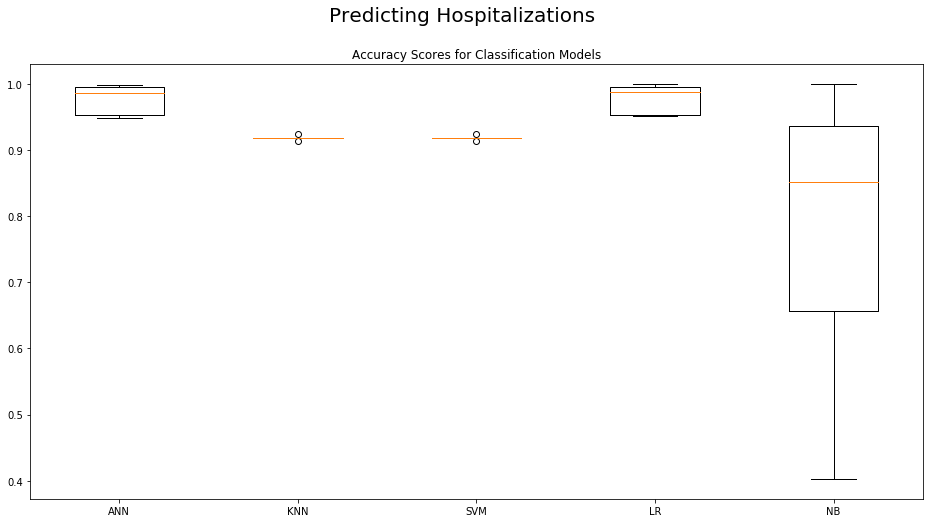

In [254]:
_ = plt.boxplot(cv_hosp_test_scores, labels=["ANN", "KNN", "SVM", "LR", "NB"])
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.suptitle("Predicting Hospitalizations", fontsize=20)
_ = plt.title("Accuracy Scores for Classification Models")

In [257]:
cv_hosp_accuracy_means = [np.mean(l) for l in cv_hosp_test_scores]

In [261]:
cv_hosp_accuracy_means

[0.9757767999022124,
 0.9184353990954651,
 0.9184353990954651,
 0.9772582813836939,
 0.7691394695025058]

In [258]:
cv_hosp_accuracy_stds = [np.std(l) for l in cv_hosp_test_scores]

In [262]:
cv_hosp_accuracy_stds

[0.021055513092285105,
 0.0031917906574798773,
 0.0031917906574798773,
 0.021172812610908177,
 0.21684790515826324]

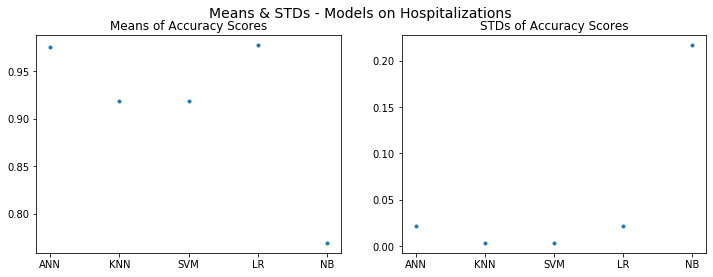

In [297]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(
    np.arange(5), 
    cv_hosp_accuracy_means, 
    linestyle="none",
    marker="."
)
ax[0].set_title("Means of Accuracy Scores")
ax[0].set_xticks(np.arange(5))
ax[0].set_xticklabels(model_labels)

ax[1].plot(
    np.arange(5), 
    cv_hosp_accuracy_stds, 
    linestyle="none",
    marker="."
)
ax[1].set_title("STDs of Accuracy Scores")
ax[1].set_xticks(np.arange(5))
ax[1].set_xticklabels(model_labels)

plt.suptitle("Means & STDs - Models on Hospitalizations", fontsize=14)

fig = plt.gcf()
fig.set_size_inches(12,4)

In [71]:
ytest_lr, yprob_lr, acc_lr, ypredict_lr = tts(lr, x_deceased_model, y_deceased_truevals)
print(classification_report(ytest_lr, ypredict_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       468
           1       0.94      0.87      0.90        38

    accuracy                           0.99       506
   macro avg       0.97      0.93      0.95       506
weighted avg       0.99      0.99      0.99       506



# Predicting Hospitalizations with Logistic Regression

Like with the deaths, Logistic Regression is the model that gives us consistently high accruacy scores. Its mean accuracy score is still the highest, and its standard deviation is slightly highger than the other two accurate models we tested (KNN and SVM).

We favor Logistic Regression to predict hospitalizations as well, though we plot ROC curves for various models below. 

In [73]:
x_hosp_model = df_trimmed.drop("hospitalized", axis=1)
y_hosp_truevals = df_trimmed["hospitalized"]

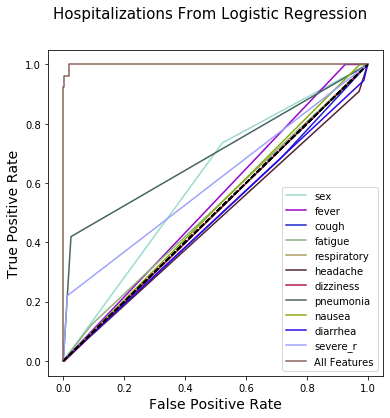

In [286]:
fig = plotROCFromModel(
    lr,
    x_hosp_model,
    y_hosp_truevals,
    "Hospitalizations From Logistic Regression",
    "hospitalized"
)

In [74]:
# Logistic Regression Precision and recall
ytest_lr, yprob_lr, acc_lr, ypredict_lr = tts(lr, x_hosp_model, y_hosp_truevals)
print(classification_report(ytest_lr, ypredict_lr))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       469
           1       0.87      0.70      0.78        37

    accuracy                           0.97       506
   macro avg       0.92      0.85      0.88       506
weighted avg       0.97      0.97      0.97       506



# Evaluating Logistic Regression

Logistic regression initially gave us very promising accuracy scores from cross validation and looking at the ROC curves.

Looking at the precision and recall values, however, reveal that our logistic regression model is much better at predicting negatives (non-deaths) than positives (deaths).

Predicting deaths from symptoms, however, was still fairly high.

Death Predictions

Precision: 0.94

Recall: 0.87

Hospitalization Predictions

Precision: 0.87

Recall: 0.70

Two notable predictor features we noticed were pnuemonia and severe respiratory problems. We examine pneumonia below.

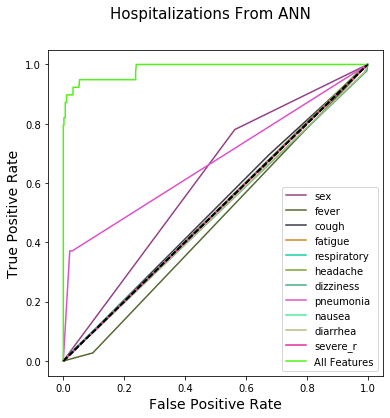

In [287]:
fig = plotROCFromModel(
    ann,
    x_hosp_model,
    y_hosp_truevals,
    "Hospitalizations From ANN",
    "hospitalized"
)

In [89]:
fig = plotROCFromModel(
    kn,
    x_hosp_model,
    y_hosp_truevals,
    "Hospitalizations From KNN",
    "hospitalized"
)

ValueError: too many values to unpack (expected 3)

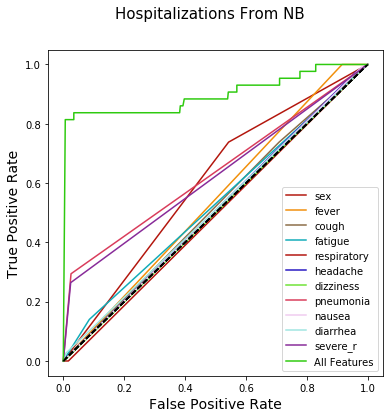

In [290]:
fig = plotROCFromModel(
    nb,
    x_hosp_model,
    y_hosp_truevals,
    "Hospitalizations From NB",
    "hospitalized"
)

# Examining Pneumonia/Deceased Relationship

In [45]:
# Cross validate on just pneumonia as a predictor
cv_pneumonia = cross_validate(
    lr,
    df_trimmed["pneumonia"].values.reshape(-1,1), 
    y_deceased_truevals,
    cv=5, 
    scoring="accuracy"
)

In [309]:
cv_pneumonia

{'fit_time': array([0.00499916, 0.00299954, 0.00401044, 0.00299907, 0.00400949]),
 'score_time': array([0.        , 0.00100064, 0.        , 0.00099993, 0.        ]),
 'test_score': array([0.90617284, 0.92345679, 0.9308642 , 0.9480198 , 0.95792079])}

In [ ]:
np.mean

In [21]:
np.sum(df_trimmed["pneumonia"])

108.0

In [61]:
# Look at a confusion matrix for pneumonia.
# Do this with a single train test split.
x_pneumonia = df_trimmed.drop("pneumonia", axis=1)
y_pneumonia = df_trimmed["pneumonia"]
xp_train, xp_test, yp_train, yp_test = train_test_split(
    x_pneumonia,
    y_pneumonia
)
lr.fit(xp_train, yp_train)
y_pneumonia_predict = lr.predict(xp_test)
confusion_matrix(yp_test, y_pneumonia_predict)

array([[478,   5],
       [ 11,  12]], dtype=int64)

In [70]:
# Number of penumonia cases / number of deaths
np.sum(df_trimmed["pneumonia"]) / np.sum(df_trimmed["deceased"])

0.7883211678832117

In [76]:
# Take a look at some more classification metrics.
print(classification_report(yp_test, y_pneumonia_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       483
         1.0       0.71      0.52      0.60        23

    accuracy                           0.97       506
   macro avg       0.84      0.76      0.79       506
weighted avg       0.97      0.97      0.97       506



We have a very high precision and recall for negative classes, and precision/recalls of 67% and 63% for positive classes.

This tells us that the model is great at predicting negative deaths from pneumonia, but not as good at predicting positives.